In [4]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile, loadmat                # Lydfil I/O
from IPython.display import Video

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib inline

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Signals in the Frequency Domain

* **Course AIS2201 - Signal Processing**
* **Week 35, 2024**
* **Lecturer: Kai Erik Hoff**



# Topics
<div style="width: 100%;">
    <img src="Figurer/04_Frekvensrepresentasjon/Fig0_EKG.png" style="float: right; width: 35%" />
    <div style="width: 55%">
    <br>
    <ul>
      <li>Sinusoids recap</li>
      <li>Intro to spectral representation</li>
      <li>Linear and Logarithmic Scale</li>
      <li>Interpreting the Fourier Series</li>
      <li>Signal operations in the frequency domain</li>
      <li>Noise in the frequency domain</li>
      <li>Spectrograms</li>
<!--      <li>Periodiske signal</li>
      <li>Fourierrekke intro</li>
      <li>Frekvensmiksing og modulasjon</li>
      <li>Frekvensforskyvning og fourieranalyse</li>
      <li>Fourierintegralet forklart</li>-->
    </ul>  
    </div>
</div> 

# Sinusoids recap

## Dekomponering av sinusformede bølger illustrert

<img src="Figurer/04_Frekvensrepresentasjon/Fig5-4_Euler3D.png" style="width: 65%; margin-left: 100px" />

1. Med reelle signal menes at de ikke har noen imaginær komponent. 
2. Legg merke til at magnituden til hver frekvenskomponent er $\frac{1}{2}$

# Why do we need spectral representation?


<div style="width: 100%;">
    <img src="Figurer/04_Frekvensrepresentasjon/Fig3_SpectrumAnalyzer.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <ul>
      <li>Signal analysis.</li>
      <ul>
          <li> Overview of Signal Properties</li>
          <li> Measuring signal quality</li>
          <li> Frequency-domain analysis of a physical system</li>
          <li> Identifying sources of disturbance in a system</li>
          <li> Much more.. </li>
        </ul>
      <li>Processing.</li>
      <ul>
          <li>Voice recognition (and other pattern recognition)</li>
          <li>Compression</li>
          <li>Filtering</li>
          <li>etc.</li>
      </ul>
    </ul>  
    </div>
</div> 

## Periodic signals and fundamental frequencies
<br>
<div style="width: 100%;">
    <img src="Figurer/04_Frekvensrepresentasjon/Fig1_Harmonics.png" style="float: right; width: 35%" />
    <div style="width: 55%">
    <br>
    <ul>
      <li>A signal $x(t)$ is perodic if there exists a time interval $T_0$ where $x(t-T_0) = x(t)$.</li>
      <li>Periodic signals can be described as a sum of sinusoids</li>
      <ul><li>Each frequency component has a frequency which is an integer multiple of the fundamental frequency $f_0 = \frac{1}{T_0}$.</li>
          <li>The $k$'th harmonic component has frequency $f_k = \frac{k}{T_0}$.</li></ul>
    </ul>  
    </div>
</div> 

## Periodic signal example: *musical notes*
* Analysis of the frequency content of a musical note will show a majority presence of harmonic components.
    * Frequency spectrum has "peaks" at regular intervals $f_k = \frac{k}{T_0}$.
 
<img src="Figurer/04_Frekvensrepresentasjon/Fig2_PianoSpectrum.png" style="width: 90%" />
<!--* Analyse av frekvensinnholdet til en musikalsk tone viser tydelig at signalet i hovedsak består av et periodisk signal.
    * Det oppstår regelmessige "topper" i frekvensspekteret for alle frekvensene $f_k = \frac{k}{T_0}$.
-->
    


# Frequency-domain properties



### Some important mathematical notations
* $x(t)$:  amplitude value of signal over time.


* $X(f)$ or $X(\omega)$: Properties of the signal's frequency components with frequency $f$ cycles per second or $\omega$ radians per second. Complex function:
    * $|X(f)$| / $|X(\omega)|$: Magnitude spectrum
    * $\angle(X(f))$ / $\angle(X(\omega))$: Phase spectrum
    
<!--
* $X(f)$ or $X(\omega)$: Egenskapene til signalets frekvenskomponent med frekvens lik $f$ svingninger i sekundet eller $\omega$ rad/s. <br> Deles opp som følger:
    * $|X(f)$| / $|X(\omega)|$: Frekvenskomponentens styrkegrad
    * $\angle(X(f))$ / $\angle(X(\omega))$: Frekvenskomponentens faseledd
-->

### Two-sided spectrums
* Signals have both positive *and* negative frequency components
* Real-valued signals are *always* complex conjugately symmetric:

$$\begin{align}
X(-f) &= X^{*}(f) \\
|X(-f)| &= |X(f)| \\
\angle X(-f) &= - \angle X(f)
\end{align}$$

* *Why* are real-valued signals always complex-conjugate symmetric? Because the sum of to complex conjugate numbers $z$ and $z^*$ is always $2\cdot \mathcal{R}e(z)$:
$$z + z^* = x + jy + x - jy = 2 \cdot x$$







## Two-sided frequency spectrum of sinusoid
<div style="width: 100%;">
    <img src="Figurer/04_Frekvensrepresentasjon/Fig5-5_CosineFreq.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <br>
        <br>

</div> 

$$\begin{align}
x(t) &= \cos\left(2\pi \cdot 80 \cdot t - \frac{5\pi}{6}\right) \\
&= \frac{1}{2}\cdot \left( e^{j \frac{5\pi}{6}}\cdot e^{-j160\pi t} + e^{-j \frac{5\pi}{6}}\cdot e^{j160\pi t} \right)
\end{align}$$

* Tosidig frekvensspekter gir en "komplett" matematisk fremstilling av signalets frekvensinnhold dekomponert til komplekse eksponentialer

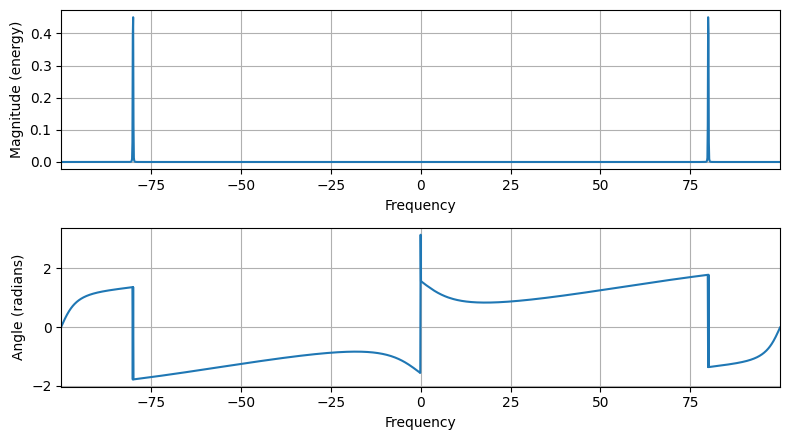

In [17]:
T, fs = 10, 200
t = np.linspace(0, T, T*fs+1)
x = cos(2*pi*80*t - 5/6*pi)
plt.subplot(2,1,1)
plt.magnitude_spectrum(x, Fs = fs, sides="twosided");
plt.subplot(2,1,2)
plt.angle_spectrum(x, Fs=fs, sides="twosided");


# Linear and Logarithmic Scale

* Logarithmic scale often used for spectral analysis of signals.
    * Each "step" along y-axis corresponds with $N$ times more signal power than the previous step.
    * Strong signal components do not "overshadow" weak signal components

-0.017109642338161535 0.0


(0.0, 4000.0)

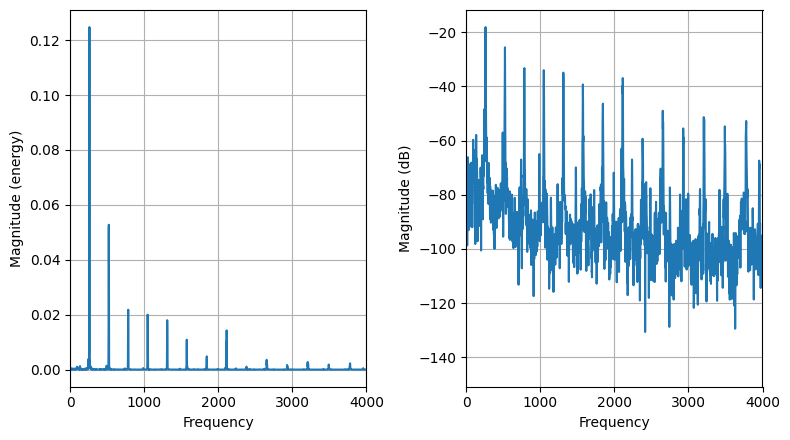

In [30]:
from scipy.io import wavfile
from IPython.display import Audio
fs, sampleData = wavfile.read("Datafiler/03_Sinussignal/piano.wav") # Load audio file
x = sampleData/max(abs(sampleData)) # Normaliser til -1 < x[n] < 1 og konverter til flyttall 

y = x.copy()
y[0] = 0
print(x[0], y[0])

%matplotlib inline
plt.subplot(1,2,1)
plt.magnitude_spectrum(x, fs, scale="linear")
plt.xlim([0, 4000])
plt.subplot(1,2,2)
plt.magnitude_spectrum(x, fs, scale="dB")
plt.xlim([0, 4000])

# Log scale units

## Decibel (dB)
* Typically used for for comparing power of two signals 
    * E.g. input/output of a filter. Measure of filter amplification/attenuation
$$\text{Amplification (dB)} = 10 \cdot \log\left(\frac{P_x}{P_y}\right)$$

## Decibel milliwatt (dBm)

* A measure of signal power using $1 \text{ milliWatt (mW)}$ as reference:

$$P_{dBm} = 10 \cdot \log\left(\frac{P}{1\text{ mW}}\right)$$

# Interpreting the fourier series

* A "list" of complex values, where each element determines the $\text{Magnitude}$ and $\text{Phase}$ of all quadrature components $A_k\cdot e^{j(\omega_k \cdot t+ \phi_k)}$ which combine to create a given.
<!--* En "liste" med komplekse verdier, der hvert element forteller $Amplituden$ og $Fasen$ til alle *komplekse eksponential-funksjoner* $A_k\cdot e^{j(\omega_k \cdot t+ \phi_k)}$ som til sammen utgjør et sammensatt signal.
-->
* The frequency  $F_k$ of each component is determined by the position $k$ in the series, and is a measure of *how many cycles* the component will complete during the analysis interval $T_0$ (the fundamental period).

$$f_k =\frac{k}{T_0}$$

* A fourier series can be described as a *discrete* representation of a signal $x(t)$ in the frequency domain.
* Example:

|$k:$|$-4$|$-3$|$-2$|$-1$|$0$|$1$|$2$|$3$|$4$|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|$c_k:$| $\frac{j}{4\pi}$|$\frac{j}{3\pi}$|$\frac{j}{2\pi}$|$\frac{j}{\pi}$|$0$|$\frac{-j}{\pi}$|$\frac{-j}{2\pi}$|$\frac{-j}{3\pi}$|$\frac{-j}{4\pi}$|
* Vi kan plotte fourierrekken som et frekvensplot: la $f_0 = 20Hz$

Text(0, 0.5, 'Phase (rad)')

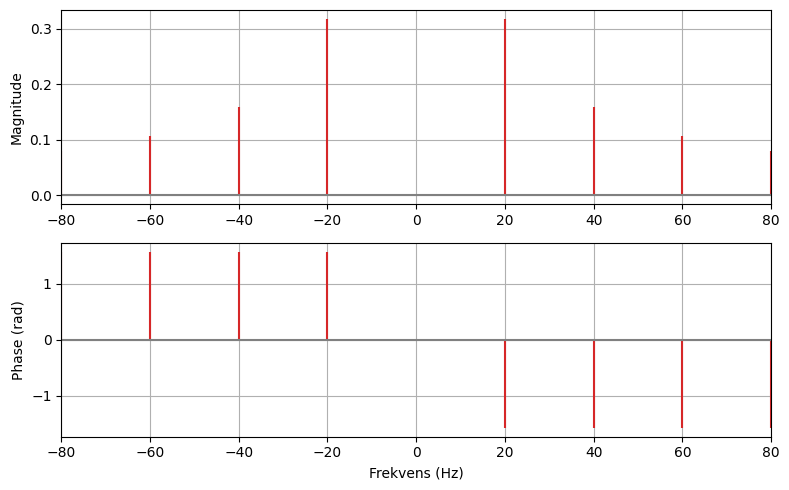

In [21]:
f_0 = 20 # Hz
T_0 = 1/f_0
%matplotlib inline

k = np.arange(-4, 5)
c_k = np.array([1j/4, 1j/3, 1j/2, 1j, 0, -1j, -1j/2, -1j/3, -1j/4])/pi

f_k = k*f_0

plt.close(2); plt.figure(2, figsize=(8,5))
plt.subplot(2,1,1)
plt.stem(f_k, np.abs(c_k),linefmt='tab:red', markerfmt='', basefmt='grey')
plt.grid(True)
plt.ylabel("Magnitude")
plt.subplot(2,1,2)
plt.stem(f_k, np.angle(c_k),linefmt='tab:red', markerfmt='', basefmt='grey')
plt.grid(True)
plt.xlabel("Frekvens (Hz)")
plt.ylabel("Phase (rad)")

# Fourier series mathematic summarized

* From time domain to fourier series.

$$ c_k = \frac{1}{T_0} \cdot \int_{0}^{T_0}e^{-j\frac{2\pi \cdot k}{T_0}t}\cdot  x(t) \ dt$$

* From fourier series to time domain

$$x(t) = \sum_{k=-\infty}^{\infty} c_k \cdot e^{-j\frac{2\pi \cdot k}{T_0}t}$$

* Recommended videos on the topic:
    * [Fourier Visualized](https://www.youtube.com/watch?v=spUNpyF58BY)
    * [Uncertainty Principle](https://www.youtube.com/watch?v=MBnnXbOM5S4)

## Coding example: finding fourier series coefficients
* Use a computational approach to calculating the fourer series of a triangle wave for  $-10\leq k \leq 10$. 

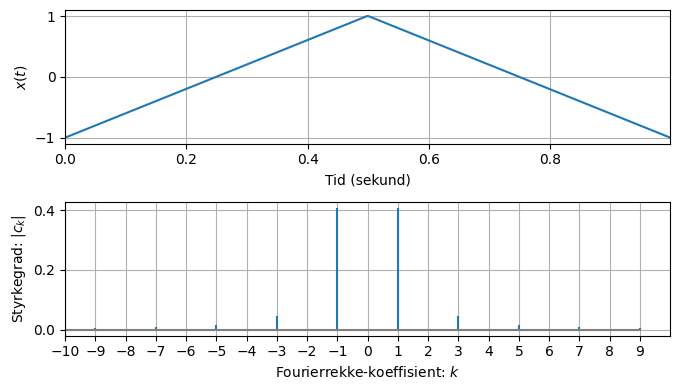

In [22]:
# Her lager vi 1 periode av trekantpulsen x(t):
fs = 500; T_0 = 1 # 1 sekund
t = np.linspace(0, T_0, int(T_0*fs), endpoint=False)
x_t = np.concatenate((np.linspace(-1, 1, int(fs*T_0/2)), np.linspace(1, -1, int(fs*T_0/2))))

# Utfør fourierrekkedekomposisjon

k = np.arange(-10, 10)
c_k = np.zeros(len(k))*1j

for index, value in enumerate(k):
    c_k[index] = np.mean(x_t*exp(-2j*pi*value*t/T_0))

plt.close(1); plt.figure(1, figsize=(7,4))
plt.subplot(2,1,1)
plt.plot(t, x_t)
plt.xlabel("Tid (sekund)")
plt.ylabel(r"$x(t)$")
plt.grid(True)
plt.subplot(2,1,2)
plt.stem(k, np.abs(c_k),basefmt="grey").markerline.set_markersize(0)
plt.xticks(k)
plt.xlabel(r'Fourierrekke-koeffisient: $k$')
plt.ylabel(r'Styrkegrad: $|c_k|$')
plt.grid(True)
plt.xlim([-10, 10])
plt.tight_layout()# Rydd plass til aksenavn mellom plot

## Coding example 2: generating a waveform from coefficients
* Reconstruct  $x(t)$ based on the coefficients $c_k$. 

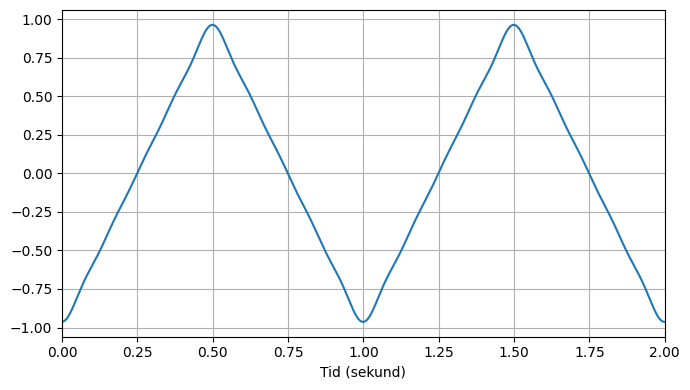

In [20]:
# Funksjon for å generere signal fra fourierrekke:
def inverseFourier(k, c_k, fs, T=1, T_0=1):
    t = np.linspace(0, T, int(fs*T)) # Array med tidsverdier
    x_est = np.zeros(int(fs*T))*1j   # Tom array med riktig størrelse
    
    # Summering av fourierrekken skjer i denne løkken
    for i, k_i in enumerate(k):
        x_est += c_k[i]*exp(2j*pi*k_i*t/T_0)
        
    x_est = np.real(x_est) # sett datatypen til reell
    return t, x_est

t, x_est = inverseFourier(k, c_k, fs=500, T = 2, T_0 = 1)
plt.close(2); plt.figure(2, figsize=(7,4))
plt.plot(t, x_est)
plt.xlabel('Tid (sekund)')
plt.grid(True)

# Signal operations - *scaling*

# Signal operations - *vertical shift*

# Signal operations - *horizontal shift / time shift*

# Signal operations - differentiation

## Signal analysis in the time- *and* frequency domain

* A spectrogram is used to map the properties of a signal in 3 dimensions:
    - Time *(usually x-axis)*
    - Frequency *(usually y-axis)*
    - Signal magnitude / power *(Represented using color map)*
* Useful for analyzing signals where the frequency content changes over time.
    - Relevant for almost all "real-world" signals. 
<img src="Figurer/04_Frekvensrepresentasjon/Fig19_Spectrogram2.png" style="width: 80%; margin-left: 100px" />

## Spectrograms $\approx$ musical notes?


<div style="width: 100%;">
    <img src="Figurer/04_Frekvensrepresentasjon/Fig18_Spectrogram1.png" style="float: right; width: 60%" />
    <div style="width: 40%">
        <br>
    <ul>
      <li>Musical notes use a similar approach to describing frequency content (pitch) over time.</li>
    </ul>  
    </div>
</div> 

# Code example: frequency content of music

# Fra fourier-rekke til kontinuerlig signal



<br>
<br>

### Kode-eksempel

* Rekonstruksjon av reelle signal:

$$x(t) = A_0 + 2\cdot \sum_{k=1}^{\infty} A_k \cos\left(2\pi \cdot \frac{t}{T_0} + \phi_k \right), \ \ \ c_k = A_k\cdot e^{j\phi_k}$$

* Fourierrekke-rekonstruksjon eksponentiell form:

$$x(t) = \sum_{k=-\infty}^{\infty} A_k \cdot e^{j\left(2\pi \frac{t}{T_0}+\phi_k\right) }$$

* For reelle signal er disse to helt like

### Kode-eksempel
* Fourierrekke-rekonstruksjon generell form:

$$x(t) = A_0 + 2\cdot \sum_{k=1}^{\infty} A_k \cos\left(2\pi \cdot \frac{t}{T_0} + \phi_k \right), \ \ \ c_k = A_k\cdot e^{j\phi_k}$$
* Bruk tabellen med fourierrekke-koeffisienter til å rekonstruere to grunnperioder av signalet $x(t)$
|$k:$|$-4$|$-3$|$-2$|$-1$|$0$|$1$|$2$|$3$|$4$|
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|$c_k:$| $\frac{j}{4\pi}$|$\frac{j}{3\pi}$|$\frac{j}{2\pi}$|$\frac{j}{\pi}$|$0$|$\frac{-j}{\pi}$|$\frac{-j}{2\pi}$|$\frac{-j}{3\pi}$|$\frac{-j}{4\pi}$|

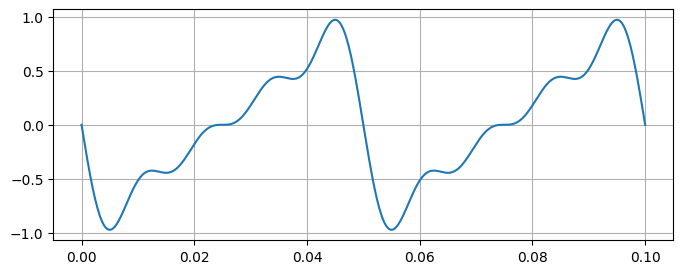

In [3]:
f_0 = 20 # Hz
T_0 = 1/f_0

t = np.linspace(0, 2*T_0, 501)
xt = (0 
      -2/pi*cos(2*pi*t/T_0-pi/2)
      -2/(2*pi)*cos(2*pi*2*t/T_0-pi/2)
      -2/(3*pi)*cos(2*pi*3*t/T_0-pi/2)
      -2/(4*pi)*cos(2*pi*4*t/T_0-pi/2)
    )

plt.close(1);plt.figure(1, figsize=(8,3))
plt.plot(t, xt)
plt.grid(True)

Dette kan vi tenke på som den "manuelle" måten å rekonstruere et signal på basert på fourierrekke-koeffisientene.

# *Tidsforskyvning* i frekvensdomenet

* Tidsforskyvning av et signal $x(t)$ beskrevet i tid tilsvaer å substutuere $t$ med $t-\tau_d$ i funksjonsuttrykket, der $\tau_d$ er forsinkelse påført signalet. 
$$y(t) = x(t-\tau_d)$$


* For sinusbølger: 
$$ \cos\left( \omega \cdot (t-\tau_d)\right) = \cos\left(\omega\cdot t-\omega \cdot \tau_d \right)$$
    - Vi påfører altså en *faseforskyvning* med $\Delta \phi = \omega\cdot \tau_d$.
    
    
* Når et signal er beskrevet av fourierrekke-koeffisientene 
$$\hat{c_k} = c_k \cdot e^{-j \frac{2\pi k}{T_0}\cdot \tau_d}, \ \ \ \frac{2\pi k}{T_0}=\omega\$$

    - $\hat{c}_k$ er symbolet for de "nye" fourierrekke-koeffisientene etter tidsforskyving



## Regneeksempel

* Finn et *funksjonsuttrykk* for fourierrekke-koeffisientene $\hat{c_k}$ til en sagtannpuls slik som vi har laget, men forsinket med $0.0125$s.

#### Vi dobbeltsjekker resultatet med å lage et plot av funksjonen vår:

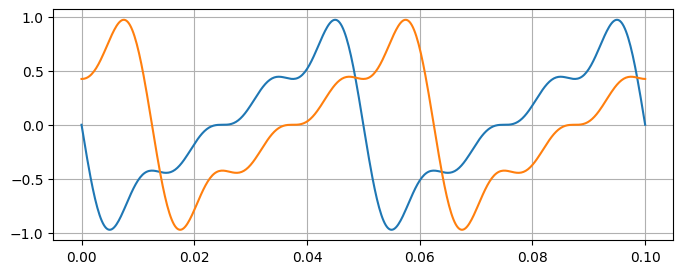

In [4]:
f_0 = 20 # Hz
T_0 = 1/f_0

t = np.linspace(0, 2*T_0, 501)
xt = (0 
      -2/pi*cos(2*pi*t/T_0-pi/2)
      -2/(2*pi)*cos(2*pi*2*t/T_0-pi/2)
      -2/(3*pi)*cos(2*pi*3*t/T_0-pi/2)
      -2/(4*pi)*cos(2*pi*4*t/T_0-pi/2)
    )

yt = (0                                       # k=0
      -2/pi*cos(2*pi*t/T_0-pi/2-pi/2)         # k=1
      -2/(2*pi)*cos(2*pi*2*t/T_0-pi/2-2*pi/2) # k=2
      -2/(3*pi)*cos(2*pi*3*t/T_0-pi/2-3*pi/2) # k=3
      -2/(4*pi)*cos(2*pi*4*t/T_0-pi/2-4*pi/2) # k=4
    )

plt.close(1);plt.figure(1, figsize=(8,3))
plt.plot(t, xt)
plt.plot(t, yt)
plt.grid(True)

<br>

# Men hvor kommer fourierrekke-koeffisientene fra?

* La oss se nærmere på formelen for fourierrekke-dekompoisjon:

$$
\begin{align}
c_k &= \frac{1}{T_0} \int_{0}^{T_0} x(t) \cdot e^{-j \frac{2\pi}{T_0} \cdot t} dt\\
 &= \frac{1}{T_0} \int_{0}^{T_0} x(t) \cdot \left(\cos \left(\frac{2\pi}{T_0} \cdot t\right)-j\sin \left(\frac{2\pi}{T_0} \cdot t\right) \right)dt \\
 &= \frac{1}{T_0} \int_{0}^{T_0} x(t) \cdot \cos \left(\frac{2\pi}{T_0} \cdot t\right)dt -j\frac{1}{T_0} \int_{0}^{T_0} x(t) \cdot \sin \left(\frac{2\pi}{T_0} \cdot t\right)dt 
\end{align}
$$

* Hva skjer når vi ganger et signal $x(t)$ med en sinusbølge?

## Interaktivt Plot: Frekvensmiksing

D:\OneDrive - NTNU\AIS2201 - Signalbehandling\2024\Forelesningsfiler\Kildekode\_04_Frekvensrepresentasjon.py:151: SyntaxWarning: invalid escape sequence '\ '
  mathtext = '$' + mathtext.replace(" ", '_'+str(i+1)+'\ ', 1) + '$'
D:\OneDrive - NTNU\AIS2201 - Signalbehandling\2024\Forelesningsfiler\Kildekode\_04_Frekvensrepresentasjon.py:471: SyntaxWarning: invalid escape sequence '\c'
  titleStr = r"$x(t)\cdot e^{-j\frac{2\pi \cdot" +str(k)+"}{T_0}\cdot t}$"


Output()

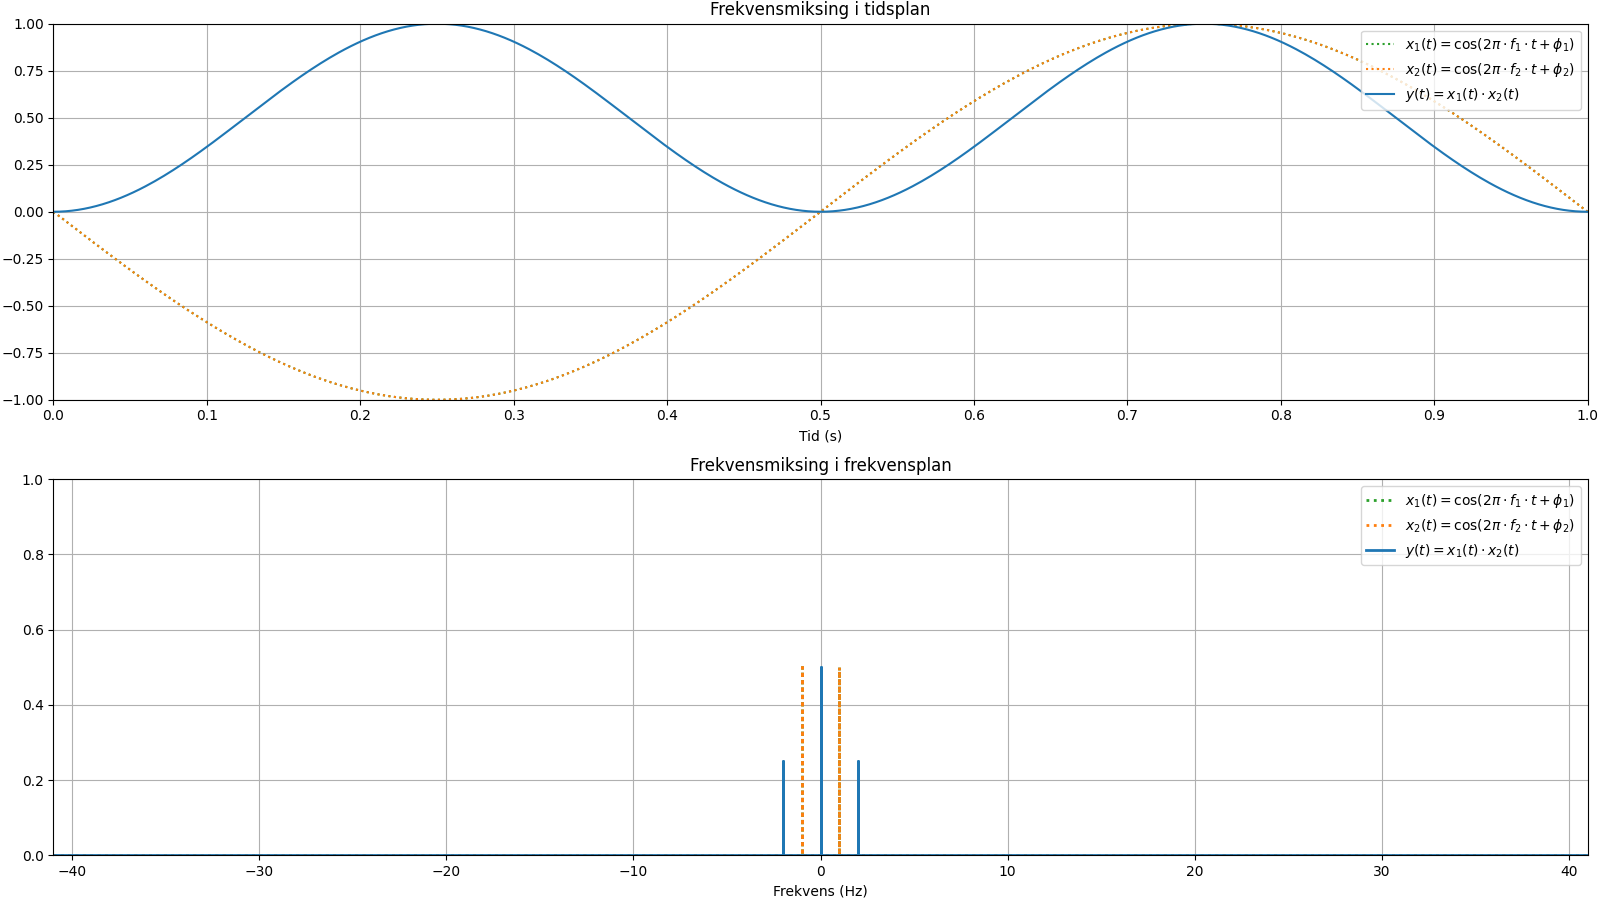

In [5]:
%matplotlib ipympl
from Kildekode._04_Frekvensrepresentasjon import FrequencyMixingDemo
FrequencyMixingDemo(fig_num=2, figsize=(16,9));

## Multiplikasjon av sinusformede bølger illustrert i frekvensdomenet

<img src="Figurer/04_Frekvensrepresentasjon/AM_animation.gif" style="width: 60%; margin-left: 100px" />


# Miksing av andre signal

* Hva kan frekvensmiksing brukes til?
* Hva skjer når vi begynner å arbeide med andre signal enn sinusformede bølger?

# Amplitudemodulasjon: anvendt frekvensmiksing

* Første metode for overføring av lydsignal med radiobølger.
    - Lydsignalet "mikses" med en **bærefrekvens**.
    
<img src="Figurer/04_Frekvensrepresentasjon/Fig6_AM.png" style="width: 70%; margin-left: 100px" />

NB! Temaene modulasjon og demodulasjon omtales også i boka i kapittel 8.7-8.9, men her i konteksten av *digitale signal* som oppfører seg litt annerledes. Om du leser disse delkapitlene i boka er den sirkulære representasjonen av frekvensinnholdet til signalene en konsekvens av at boka snakker om samplede signal med en øvre grense for hvor høy frekvensen til en frekvenskomponent kan være.

### Illustrasjon 1: Amplitudemodulasjon av sagtannpuls

Text(0.5, 1.0, 'y(t)')

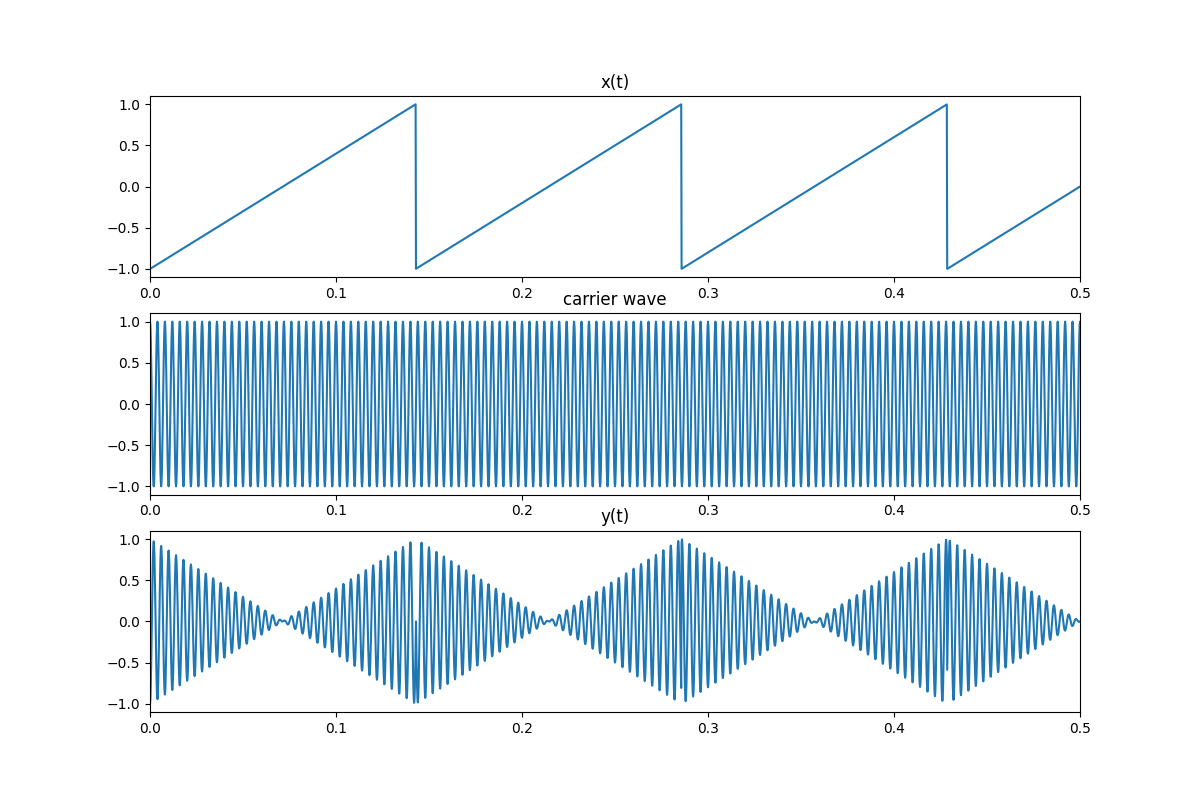

In [6]:
import scipy.signal as sig
# Her lager vi 10 sekund av sagtannpulsen x(t):
fs = 5000; T = 10
t = np.linspace(0, T, int(T*fs), endpoint=False)
x_t = sig.sawtooth(2*pi*7*t)

carrier = cos(2*pi*250*t) # Modulasjonsmølgen

y_t = x_t*carrier         # Modulert signal 

# Vis 0.5 sekund hvert signal i eget subplot
plot_window = 0.5
plt.close(2)
plt.figure(2, figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(t, x_t)
plt.xlim([0, plot_window])
plt.title('x(t)')
plt.subplot(3,1,2)
plt.plot(t, carrier)
plt.xlim([0, plot_window])
plt.title('carrier wave')
plt.subplot(3,1,3)
plt.plot(t, y_t)
plt.xlim([0, plot_window])
plt.title('y(t)')

### Illustrasjon 2: Amplitudemodulasjon i frekvensdomenet

(-500.0, 500.0)

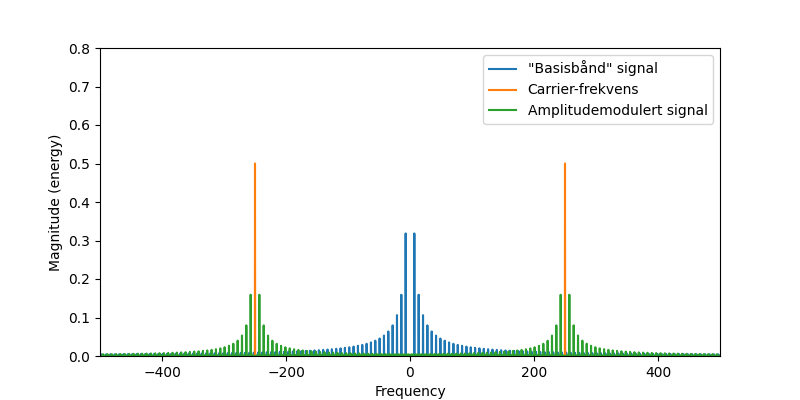

In [7]:
import scipy.signal as sig
fs = 5000; T = 10
t = np.linspace(0, T, int(T*fs), endpoint=False)
x_t = sig.sawtooth(2*pi*7*t)

carrier = cos(2*pi*250*t)

y_t = x_t*carrier

plt.close(3); plt.figure(3, figsize=(8, 4)) # Figsize bør endres når ikke i "presentasjonsmodus"


plt.magnitude_spectrum(x_t, fs, label='"Basisbånd" signal', sides='twosided')

plt.magnitude_spectrum(carrier, fs, label='Carrier-frekvens', sides='twosided')

plt.magnitude_spectrum(y_t, fs, label='Amplitudemodulert signal', sides='twosided')  

plt.legend()
plt.ylim([0, 0.8])
plt.xlim([-500, 500])

## Hva har vi observert?

* Når et signal $x(t)$ multipliseres med en bærebølge skjer følgende:
    1. Det er tydelig at frekvensinnholdet til signalet ($X(f)$) blir flyttet *både* opp *og* ned langs frekvensaksen.
    2. Styrkegraden til hver av de to "kopiene" til firkantpulsen blir halvert

## Matematisk definisjon:

|$\text{Tidsdomene}$|$\text{Frekvensdomene}$|
|:--|:--|
|$y(t) = x(t)\cdot \cos(2\pi \cdot f_c \cdot t)$ | $Y(f) = \frac{1}{2}X(f-f_c) + \frac{1}{2}X(f+f_c)$|

# Rekonstruksjon

* Hvordan kan mottakeren få flyttet signalets frekvensinnhold ned til "basisbåndet" igjen?    
<img src="Figurer/04_Frekvensrepresentasjon/Fig6-6_AM_rx.png" width="75%" />

### EIllustrasjon 3: Demodulasjon

(-600.0, 600.0)

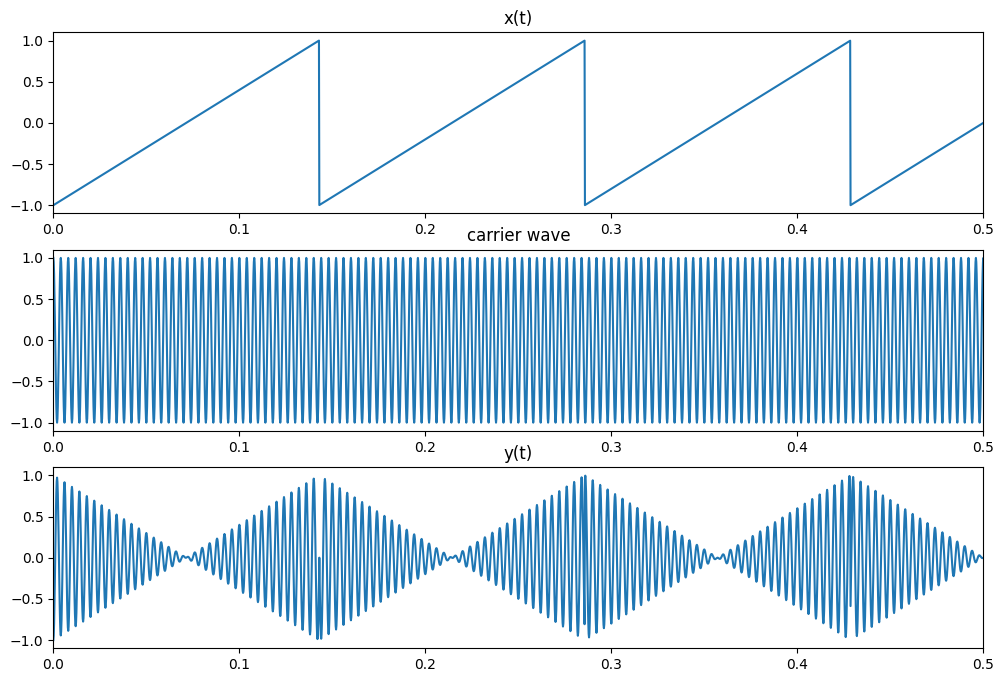

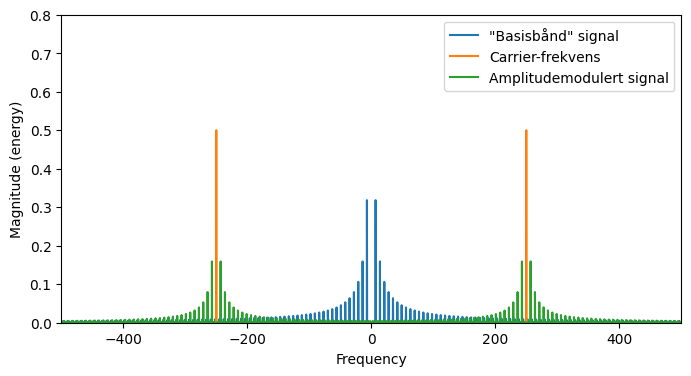

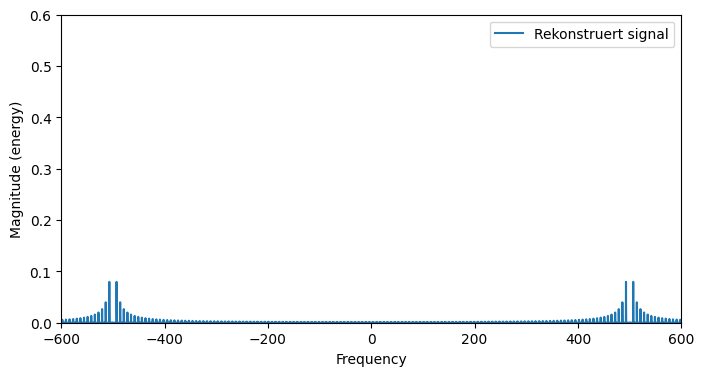

In [8]:
%matplotlib inline
fs = 5000; T = 10
t = np.linspace(0, T, int(T*fs), endpoint=False)
x_t = sig.sawtooth(2*pi*7*t)

carrier = cos(2*pi*250*t)

y_t = x_t*carrier

carrier2 = cos(2*pi*250*t+pi/2)

x_reconstructed = y_t*carrier2
plt.close(4); plt.figure(4, figsize=(8, 4)) # Figsize bør endres når ikke i "presentasjonsmodus"


#displayDualSpectrum(y_t, fs, label='Amplitudemodulert signal')

#displayDualSpectrum(carrier, fs, label='Demodulasjons-frekvens')

plt.magnitude_spectrum(x_reconstructed, fs, label='Rekonstruert signal' ,sides='twosided')  


plt.legend()
plt.ylim([0, 0.6])
plt.xlim([-600, 600])

## Matematisk forklaring av demodulasjonsproblemet

\begin{align}
x_{demod}(t) &= \left(x(t)\cdot \cos(2\pi \cdot f_c \cdot t) \right) \cdot \cos(2\pi \cdot f_c \cdot t + \phi) \\
 &= x(t)\cdot \left(\cos(2\pi \cdot f_c \cdot t) \cdot \cos(2\pi \cdot f_c \cdot t + \phi) \right)\\
 &= x(t) \cdot \left(\frac{1}{2}\cos(\phi) + \frac{1}{2} \cos(4\pi \cdot f_c \cdot t + \phi)  \right)\\
 &= \frac{\cos(\phi)}{2} \cdot x(t) + \frac{1}{2}\cdot x(t) \cdot \cos(4\pi \cdot f_c \cdot t + \phi)  \\ \\
X_{demod}(f) &= \frac{\cos(\phi)}{2}\cdot X(f) + \frac{1}{4}\cdot X(f-2f_c) + \frac{1}{2} \cdot X(f+2f_c)
\end{align}

* Styrkegraden til basisbånd-delen vi ønsker å beholde er helt avhengig av faseforskjellen mellom bærebølge brukt til modulasjon og bærebølge brukt til demodulasjon.

### Illustrasjon 4: Kompleks demodulasjon 

NameError: name 'å' is not defined

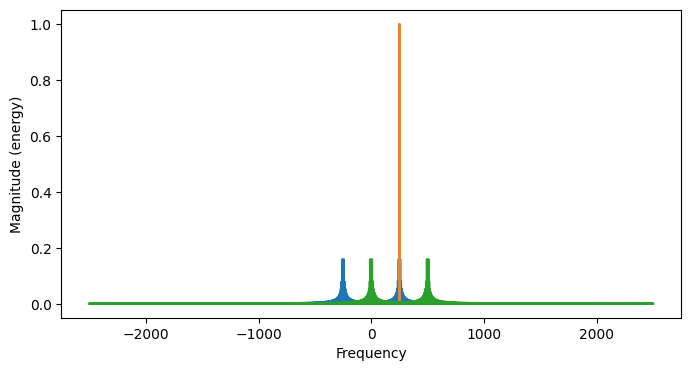

In [9]:
fs = 5000; T = 10
t = np.linspace(0, T, int(T*fs), endpoint=False)
x_t = sig.sawtooth(2*pi*7*t)

carrier = cos(2*pi*250*t)

y_t = x_t*carrier

carrier2 = cos(2*pi*250*t)+1j*sin(2*pi*250*t) # = e^2j*pi*250*t

x_reconstructed = y_t*carrier2
plt.close(5); plt.figure(5, figsize=(8, 4)) # Figsize bør endres når ikke i "presentasjonsmodus"


plt.magnitude_spectrum(y_t, fs, label='Amplitudemodulert signal', sides="twosided")

plt.magnitude_spectrum(carrier2, fs, label='Demodulasjons-frekvens', sides="twosided")

plt.magnitude_spectrum(x_reconstructed, fs, label='Rekonstruert signal', sides="twosided" )  

å
plt.legend()
plt.ylim([0, 1.1])
plt.xlim([-600, 600])

# Signaloperasjoner - *Frekvensforskyving*

* Forekommer ved multiplikasjon av et signal $x(t)$ med en komplekse eksponential. 
* Signalets frekvensinnhold forskyves i frekvensdomenet i tråd med rotasjonsfrekvensen til det komplekse eksponentialet.
### $$x(t) \cdot e^{j2\pi\cdot f_c \cdot t}$$

<img src="Figurer/04_Frekvensrepresentasjon/Fig6-3_FreqShift.png" style="width: 65%; margin-left: 100px" />

# Frekvensforskyvning og frekvensanalyse

* Frekvensforskyvning er nøkkelen til fourieranalyse

* Hva som skjer under fourierrekke-dekomposisjon kan forklares med følgende punkt:
    1. Frekvenskomponenter med frekvens $f=0$ tilsvarer et *konstantledd*. 
    2. Nivået til et konstantledd kan identifiseres ved å regne ut signalets *middelverdi*.
    3. Med bruk av frekvensmiksing kan *alle* frekvenskomponenter forskyves til de får frekvens $f = 0$ etter tur, noe som kombinert med punkt 1 og 2 gir muligheten til å regne ut en hel rekke frekvenskomponenter.
    
$$ c_k = \frac{1}{T_0} \cdot \int_{0}^{T_0}e^{-j\frac{2\pi \cdot k}{T_0}t}\cdot  x(t) \ dt$$

* Vi skal se nærmere på fourierrekke-dekomposisjon som et utgangspunkt for frekvensanalyse.
* Vi skal nå ta for oss en noe mer arbitrær bølgeform, og gå stegvis gjennom hva dette integralet faktisk gjør.

# Forklaring av fourierintegralet

<br>
<img src="Figurer/04_Frekvensrepresentasjon/Fig6-4_FourierIntegral.png" width="80%" />

# Illustrasjon: Periodisk bølgeform

<img src="Figurer/04_Frekvensrepresentasjon/Fig7_Waveform.png" style="width: 70%; margin-left: 100px" />

* Tydelig periodisk struktur.
* Periodetidene er merket langs tidsaksen.

# Avgrensning til én signalperiode

<img src="Figurer/04_Frekvensrepresentasjon/Fig8_WaveformPeriod.png" style="width: 70%; margin-left: 100px" />

* Analyse av én periode gir informasjon om hele signalet.
    - Den samme bølgeformen gjentas "i det uendelige".

# I frekvensdomenet

<img src="Figurer/04_Frekvensrepresentasjon/Fig9_SpectrumUnknown.png" style="width: 70%; margin-left: 100px" />

* Vi vet at frekvensspekteret til bølgeformen kun vil bestå av frekvenskomponenter som svinger et heltall ganger i lpet av periodetiden $T_0$.
* Disse vil ha frekvensene $\ldots -\frac{1}{T_0}, 0, \frac{1}{T_0}, \frac{2}{T_0}, \frac{3}{T_0}, \ldots$.
    - Frekvenskomponent nummer $k$ har frekvens $f_k = \frac{k}{T_0}$.

# Utregning av frekvensinnhold for $f=0 Hz$

* Utregning av middelverdien til $x(t)$ i tidsintervallet $0\leq t < T_0$:

$$ = \frac{1}{T_0} \cdot \int_{0}^{T_0} x(t)dt$$

* Gjennomsnittet til et signal over én signalperiode vil alltid være lik konstantleddet til signalet.

# Frekvensinnhold for $f=0Hz$

<img src="Figurer/04_Frekvensrepresentasjon/Fig10_WaveformAvg.png" style="width: 70%; margin-left: 100px" />

* Konstantledd:
$$ \frac{1}{T_0} \cdot \int_{0}^{T_0} x(t)dt = 0.7$$

# Frekvensinnhold for $f=0Hz$

<img src="Figurer/04_Frekvensrepresentasjon/Fig11_Spectrum2.png" style="width: 70%; margin-left: 100px" />

* Har identifisert frekvenskomponent med frekvens lik 0Hz.

# Forskyvning av frekvensinnholdet

* Miksing av $x(t)$ med en roterende vektor.

<img src="Figurer/04_Frekvensrepresentasjon/Fig12_SpectrumUnknown2.png" style="width: 70%; margin-left: 100px" />

* Frekvensforskyvning av signalinnholdet med $\Delta f = \frac{1}{T_0}Hz$ er det samme som å påføre én full rotasjon på signalet i løpet av tidsintervallet $0\leq t <T_0$.
    * En slik rotasjon vil kun ha mening når vi plotter det relle signalet i det komplekse plan.

# Frekvensforskyvning i tidsplanet:


<video
    controls
    src="Figurer/04_Frekvensrepresentasjon/Fourier.mp4"
    width=1000
    embed=True>
</video>

# Frekvensinnhold for $f = \frac{1}{T_0}$


<img src="Figurer/04_Frekvensrepresentasjon/Fig13_FourierCoeff1.png" style="width: 70%; margin-left: 100px" />

# Oppdatering av frekvensspekteret


<img src="Figurer/04_Frekvensrepresentasjon/Fig14_FourierCoeff2.png" style="width: 70%; margin-left: 100px" />

* Konstantleddet i det frekvensforskjøvne signalet er frekvensinnholdet for $f=\frac{1}{T_0}$.
* Utnytter symmetrisk spekter for relle signal:
$A_{-1} = A_1 = 0.68$
* Samme operasjon repeteres for $k = 2, 3, 4, \ldots$

## [Fourierrekke-dekomposisjon illustrert med interaktivt plot](04_Frekvensrepresentasjon_FourierDemo.ipynb)

* Plassert i egen notebook-fil ettersom kompleksiteten ser ut til å skape problemer når den benyttes i en notebook med mange andre plot og demoer.

# Matematikken Oppsummert

* Fra tidsplan til fourierrekke.

$$ c_k = \frac{1}{T_0} \cdot \int_{0}^{T_0}e^{-j\frac{2\pi \cdot k}{T_0}t}\cdot  x(t) \ dt$$

* Fra fourierrekke til tidsplan

$$x(t) = \sum_{k=-\infty}^{\infty} c_k \cdot e^{j\frac{2\pi \cdot k}{T_0}t}$$

* Jeg kan også anbefale et par youtube-videoer om temaet:
    * [Fourier Visualized](https://www.youtube.com/watch?v=spUNpyF58BY)
    * [Uncertainty Principle](https://www.youtube.com/watch?v=MBnnXbOM5S4)

# Spørsmål?